# Logistic Regression Classifier Using Temporal Decoding
* analyzing eeg signals over time with temporal decoding. 

## Try classification with one run of one subject 
* It has been discovered that adding more data in the form of different runs of a subject as well as including data from different subjects into one classifier, will diminish classification results.
* Below I will classify one run of one subject to show that 

In [82]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import time

#need this to create pipeline for classification
from sklearn.pipeline import make_pipeline
#for scaling data into n_sample * n_feature array
from sklearn.preprocessing import StandardScaler, MinMaxScaler()
#classifer
from sklearn.linear_model import LogisticRegression

import mne
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                         cross_val_multiscore, LinearModel, get_coef)

import os
import os.path as op

matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
matplotlib.rcParams.update({'font.size': 15})

#data path for each run of each subject.
drive_data_path = 'E:\eeg_data'

#data path on my external hdd for folder containing all tests of each subject in one file
drive_all_data_path = 'E:\eeg_data\ica_140_500_0.1'

#local path
path = 'C:\Users\Esimk\OneDrive\Desktop\eeg_data'

# plt.close('all')

### Temporal Decoding

In [131]:
epochs = mne.read_epochs(op.join(path, 'Ex10_Suj1_Run1-epo.fif'),
                          preload=True);

Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [132]:
# Since roc_auc can only be computed for binary classifcation problems, 
# data needs to be filtered for two events.

epochs = epochs[(epochs.events[:,-1] == 4) | (epochs.events[:,-1] == 5)]

In [133]:
# get X and y parameters for classificaton
# X - samples in the form n_epochs, n_channels, n_times
X = epochs.get_data() 
# events or targets
y = epochs.events[:,-1]

In [134]:
start = time.time()
clf = make_pipeline(StandardScaler(), LogisticRegression())

time_decod = SlidingEstimator(clf, n_jobs = 1, scoring = 'roc_auc')

scores = cross_val_multiscore(time_decod, X,y, cv = 5, n_jobs = 1)
end = time.time()
print("run time: ", end - start)

('run time: ', 21.430000066757202)


In [135]:
scores = np.mean(scores, axis=0)

## What does the plot below mean?
* Data is inputed into classifier in the form of n_epochs * n_channels. This is done 1400 times. once for each time point. 
* The *Sensor space decoding* graph below shows the AUC score at each time point. 

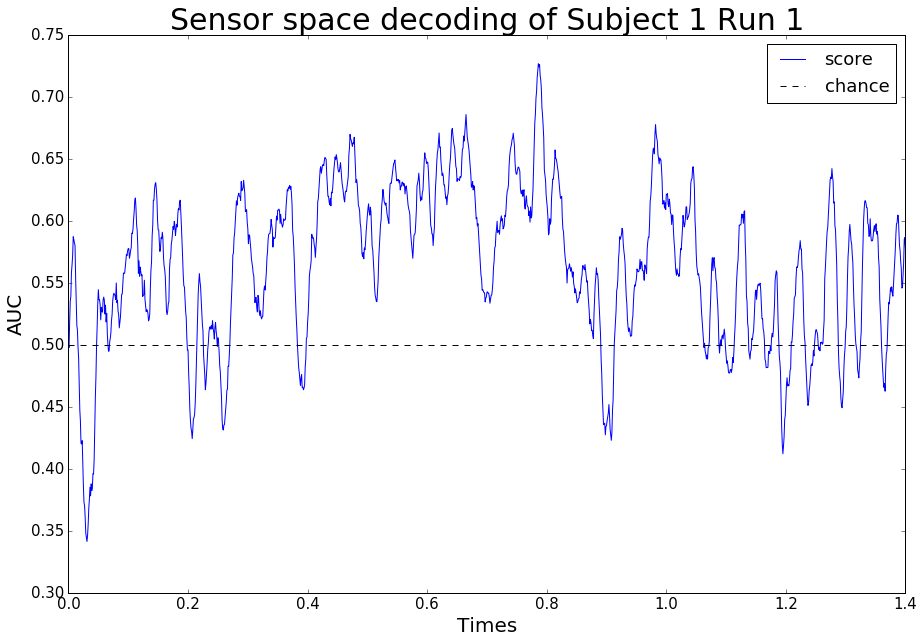

In [136]:
# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times', fontsize = 20)
ax.set_ylabel('AUC', fontsize = 20)  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding of Subject 1 Run 1', fontsize = 30)
plt.show()

In [137]:
clf = make_pipeline(StandardScaler(), LinearModel(LogisticRegression()))
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')
time_decod.fit(X, y);

## 

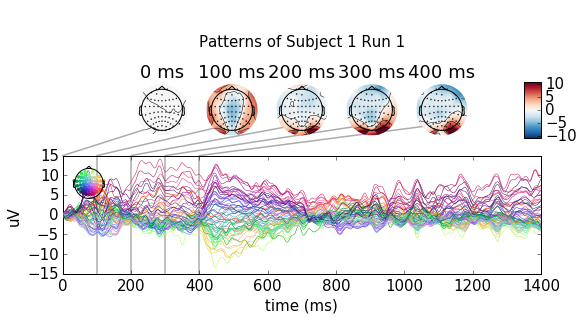

In [138]:
coef = get_coef(time_decod, 'patterns_', inverse_transform=True)
evoked = mne.EvokedArray(coef, epochs.info, tmin=epochs.times[0])
evoked.plot_joint(times=np.arange(0., .500, .100), title='Patterns of Subject 1 Run 1');

## Try with another run of same subject

In [139]:
epochs_run2 = mne.read_epochs(op.join(path, 'Ex10_Suj1_Run2-epo.fif'),
                          preload=True);

Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj1_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [140]:
epochs_run2 = epochs_run2[(epochs_run2.events[:,-1] == 4) | (epochs_run2.events[:,-1] == 5)]


In [141]:
# get X and y parameters for classificaton
# X - samples in the form n_epochs, n_channels, n_times
X = epochs_run2.get_data() 
# events or targets
y = epochs_run2.events[:,-1]

In [142]:
start = time.time()
clf = make_pipeline(StandardScaler(), LogisticRegression())

time_decod = SlidingEstimator(clf, n_jobs = 1, scoring = 'roc_auc')

scores_run2 = cross_val_multiscore(time_decod, X,y, cv = 5, n_jobs = 1)
end = time.time()
print("run time: ", end - start)

('run time: ', 20.73099994659424)


In [143]:
scores_run2 = np.mean(scores_run2, axis=0)

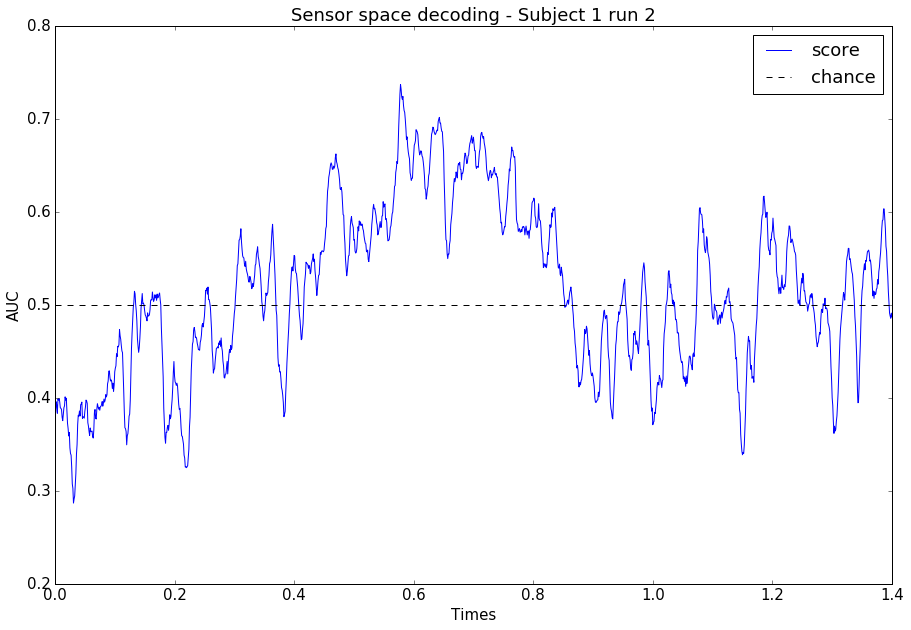

In [144]:
# Plot
fig, ax = plt.subplots()
ax.plot(epochs_run2.times, scores_run2, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding - Subject 1 run 2')
plt.show()

In [145]:
start = time.time()
clf = make_pipeline(StandardScaler(), LinearModel(LogisticRegression()))
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc')
time_decod.fit(X, y)

end = time.time()
print "time :", end - start

time : 5.03700017929


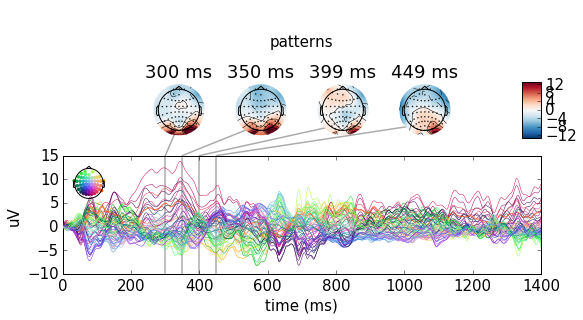

In [146]:
coef = get_coef(time_decod, 'patterns_', inverse_transform=True)
evoked = mne.EvokedArray(coef, epochs.info, tmin=epochs.times[0])
evoked.plot_joint(times=np.arange(0.300, .500, .050), title='patterns');

# Results from run 1 and run 2
* At times .4 to .9, it looks like both lines follow a similar trend with some differences throughout.

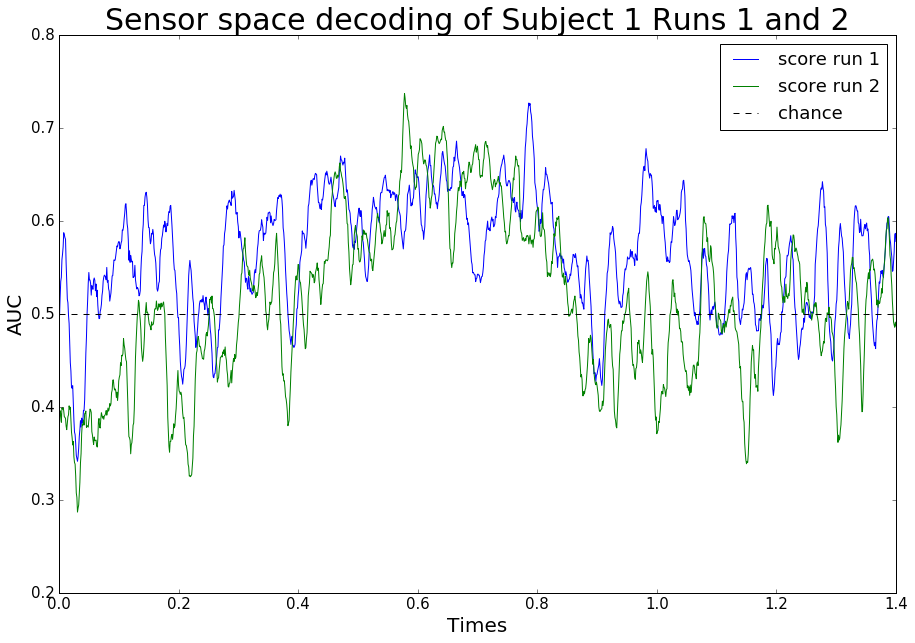

In [152]:
#overlay both plots
# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score run 1')
ax.plot(epochs_run2.times, scores_run2, label = 'score run 2' )
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times', fontsize = 20)
ax.set_ylabel('AUC', fontsize = 20)  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding of Subject 1 Runs 1 and 2', fontsize = 30)
plt.show()

## Results of run 3 and 4

In [157]:
epochs_run3 = mne.read_epochs(op.join(path, 'Ex10_Suj1_Run3-epo.fif'),
                          preload=True);
epochs_run4 = mne.read_epochs(op.join(path, 'Ex10_Suj1_Run4-epo.fif'),
                          preload=True);

epochs_run3 = epochs_run3[(epochs_run3.events[:,-1] == 4) | (epochs_run3.events[:,-1] == 5)]
epochs_run4 = epochs_run4[(epochs_run4.events[:,-1] == 4) | (epochs_run4.events[:,-1] == 5)]

Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj1_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
287 matching events found
Created an SSP operator (subspace dimension = 1)
287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj1_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
293 matching events found
Created an SSP operator (subspace dimension = 1)
293 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


('run time: ', 21.08999991416931)


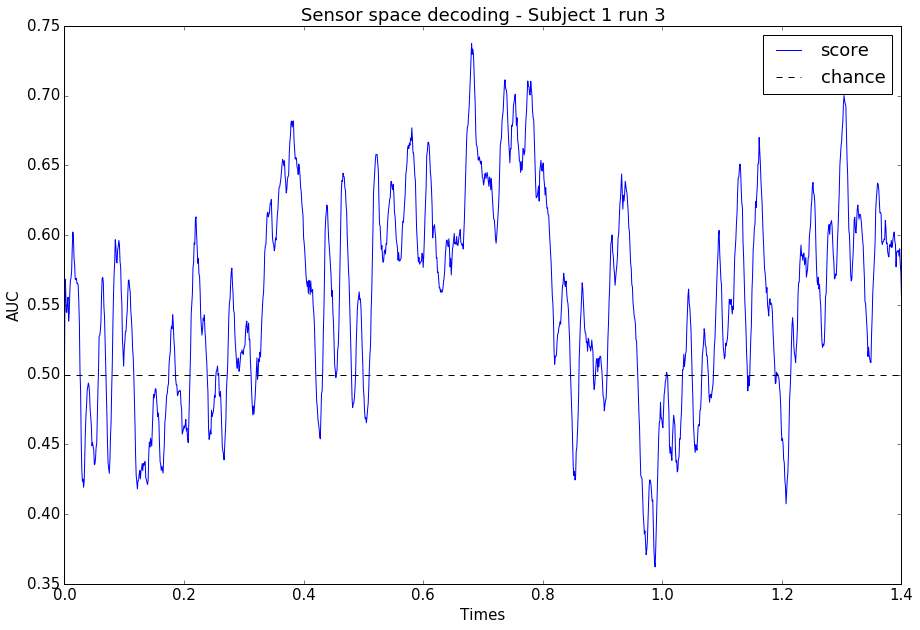

In [162]:
# get X and y parameters for classificaton
# X - samples in the form n_epochs, n_channels, n_times
X = epochs_run3.get_data() 
# events or targets
y = epochs_run3.events[:,-1]

start = time.time()
clf = make_pipeline(StandardScaler(), LogisticRegression())

time_decod = SlidingEstimator(clf, n_jobs = 1, scoring = 'roc_auc')

scores_run3 = cross_val_multiscore(time_decod, X,y, cv = 5, n_jobs = 1)
end = time.time()
print("run time: ", end - start)

scores_run3 = np.mean(scores_run3, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores_run3, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding - Subject 1 run 3')
plt.show()

('run time: ', 20.830999851226807)


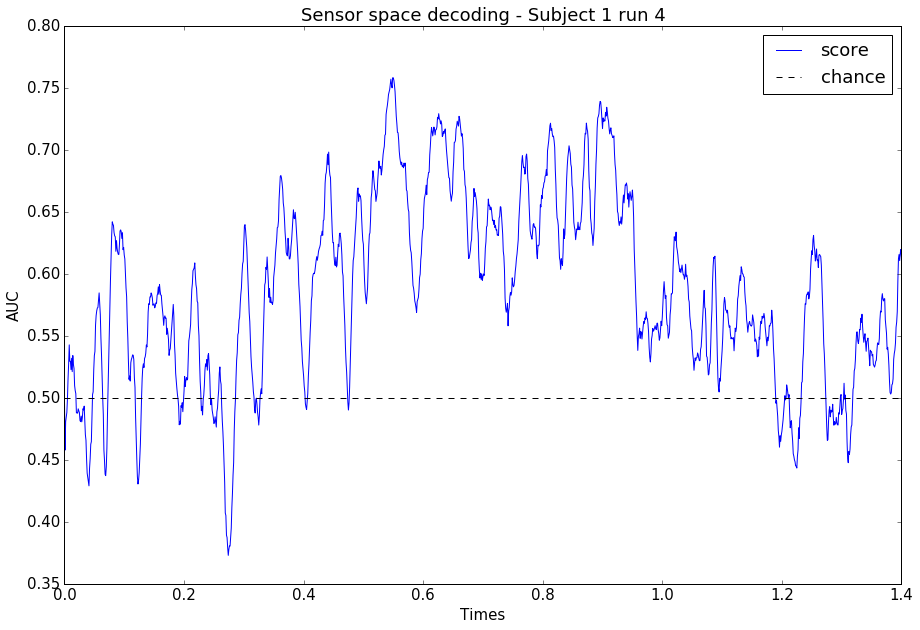

In [163]:
# get X and y parameters for classificaton
# X - samples in the form n_epochs, n_channels, n_times
X = epochs_run4.get_data() 
# events or targets
y = epochs_run4.events[:,-1]

start = time.time()
clf = make_pipeline(StandardScaler(), LogisticRegression())

time_decod = SlidingEstimator(clf, n_jobs = 1, scoring = 'roc_auc')

scores_run4 = cross_val_multiscore(time_decod, X,y, cv = 5, n_jobs = 1)
end = time.time()
print("run time: ", end - start)

scores_run4 = np.mean(scores_run4, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores_run4, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding - Subject 1 run 4')
plt.show()

## Summary of results
* In results of all four runs, none have an AUC score of above .76
* What is causing this?
* varaibles to change:
    * What would happen if the StandardScaler was changed to another scaler?
    * How would another classifer perform?
    * Try a different metric for scoring.